<a href="https://colab.research.google.com/github/JorgeRdzR/Casos/blob/main/Regresion_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso 8. Regresión Lineal Múltiple

Jorge Rodríguez Reyes

Octubre 2021

# Objetivo

Construir e interpretar modelos de regresión lineal multiple


# Descripción

Se cargan librerías necesarias
Se cargan o generan los datos
Se fragmentan los datos en datos de entrenamiento y validación
Se contruye el modelo de regresión lineal múñtile
Se interpretan los estadíticos del modelo R Square Adjusted y los coeficientes de la acuación 

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 

# Marco conceptual

En la mayoría de los problemas de investigación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión. 

La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomina modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da x1,x2,...,xk, y y como la variable dependiente.x1,x2,...,xk son las variables que afectan a la variable dependiente en el modelo de regresión lineal múltiple. 

Muchos problemas de investigación y de la industria, requieren la estimación de las relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias. 

Al generar un modelo de regresión linel múltiple es importante identificar los estadísticos de R2 R Square, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado. 

De igual forma, el valor de R2 ajustado o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad. R Square ajustado está diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo.

Una variable Y puede predecirse conforme y de cuerdo con

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 



## Cargar librerias y los datos

In [ ]:
import numpy as np
import pandas as pd

housing = pd.read_csv("https://raw.githubusercontent.com/JorgeRdzR/Casos/main/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Veamos si hay valores nulos en el conjunto de datos usando .info(), y también, tenemos que verificar si hay valores atípicos usando .describe().

In [ ]:
print(housing.info())
print("*************")
print(housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
*************
              price          area  ...     stories     parking
count  5.450000e+02    545.000000  ...  545.000000  545.000000
mean   4.

 no hay valores nulos en los datos y tampoco hay valores atípicos en los datos.

### Preparación de datos
Si observamos el conjunto de datos, hay valores numéricos y columnas con valores como 'Sí' o 'No' Pero para ajustar una línea de regresión, necesitamos valores numéricos, por lo que convertiremos 'Sí' y 'No' como 1 y 0.

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})


housing[varlist] = housing[varlist].apply(binary_map)


print(housing)

        price  area  bedrooms  ...  parking  prefarea  furnishingstatus
0    13300000  7420         4  ...        2         1         furnished
1    12250000  8960         4  ...        3         0         furnished
2    12250000  9960         3  ...        2         1    semi-furnished
3    12215000  7500         4  ...        3         1         furnished
4    11410000  7420         4  ...        2         0         furnished
..        ...   ...       ...  ...      ...       ...               ...
540   1820000  3000         2  ...        2         0       unfurnished
541   1767150  2400         3  ...        0         0    semi-furnished
542   1750000  3620         2  ...        0         0       unfurnished
543   1750000  2910         3  ...        0         0         furnished
544   1750000  3850         3  ...        0         0       unfurnished

[545 rows x 13 columns]


La furnishingstatus columna tiene tres niveles furnished, semi_furnishedy unfurnished.

Necesitamos convertir esta columna en numérica también. Para hacer eso, usaremos dummy variables.

Cuando tienes una variable categórica con n-levels, la idea de crear una variable ficticia es construir ‘n-1’ variables, indicando los niveles.

Podemos crear una variable ficticia usando el get_dummi es método en pandas.

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'])


print(status)

     furnished  semi-furnished  unfurnished
0            1               0            0
1            1               0            0
2            0               1            0
3            1               0            0
4            1               0            0
..         ...             ...          ...
540          0               0            1
541          0               1            0
542          0               0            1
543          1               0            0
544          0               0            1

[545 rows x 3 columns]


Ahora, no necesitamos tres columnas. Podemos eliminar la furnished, ya que se puede identificar solo con los valores de las dos últimas columnas donde:

* 00 corresponderá a furnished
* 01 corresponderá a unfurnished
* 10 corresponderá a semi-furnished

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)


housing = pd.concat([housing, status], axis = 1)

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

print(housing)

        price  area  bedrooms  ...  prefarea  semi-furnished  unfurnished
0    13300000  7420         4  ...         1               0            0
1    12250000  8960         4  ...         0               0            0
2    12250000  9960         3  ...         1               1            0
3    12215000  7500         4  ...         1               0            0
4    11410000  7420         4  ...         0               0            0
..        ...   ...       ...  ...       ...             ...          ...
540   1820000  3000         2  ...         0               0            1
541   1767150  2400         3  ...         0               1            0
542   1750000  3620         2  ...         0               0            1
543   1750000  2910         3  ...         0               0            0
544   1750000  3850         3  ...         0               0            1

[545 rows x 14 columns]


Ahora construyamos el modelo. Como hemos visto en el artículo del modelo de regresión lineal simple , el primer paso es dividir el conjunto de datos en datos de prueba y de tren.

Dividir los datos en dos conjuntos diferentes
Dividiremos los datos en dos conjuntos de datos en una proporción de 7: 3.

In [ ]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Cambio de escala de las funciones
Podemos ver que todas las columnas tienen valores enteros más pequeños en el conjunto de datos, excepto la area columna. Por tanto, es importante volver a escalar las variables para que todas tengan una escala comparable. Si no tenemos escalas relativas, algunos de los coeficientes del modelo de regresión serán de unidades diferentes en comparación con los otros coeficientes.

Para hacer eso, usamos el MinMaxmétodo de escala.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

print(df_train)

        price      area  bedrooms  ...  prefarea  semi-furnished  unfurnished
359  0.169697  0.155227       0.4  ...         0               0            1
19   0.615152  0.403379       0.4  ...         1               1            0
159  0.321212  0.115628       0.4  ...         0               0            0
35   0.548133  0.454417       0.4  ...         0               0            0
28   0.575758  0.538015       0.8  ...         0               0            1
..        ...       ...       ...  ...       ...             ...          ...
526  0.048485  0.118268       0.2  ...         0               0            1
53   0.484848  0.291623       0.4  ...         0               1            0
350  0.175758  0.139388       0.2  ...         0               1            0
79   0.424242  0.366420       0.4  ...         0               0            0
520  0.060606  0.516015       0.2  ...         0               0            1

[381 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


## Construyendo un modelo lineal
Antes de construir el modelo, necesitamos dividir los datos en conjuntos X e Y.

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

Primero, agregaremos las variables, excepto la variable de destino, al modelo.

###Agregar todas las variables al modelo

In [ ]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           8.83e-83
Time:                        18:13:33   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si miramos el p-values de algunas de las variables, los valores parecen ser bastante altos, lo que significa que no son significativos. Eso significa que podemos eliminar esas variables del modelo.

Antes de descartar las variables, como se discutió anteriormente, tenemos que ver multicollinearityentre las variables. Lo hacemos calculando el valor de VIF .

El factor de inflación de la varianza o VIF es un valor cuantitativo que indica cuánto están correlacionadas las variables características entre sí. Es un parámetro extremadamente importante para probar nuestro modelo lineal. La fórmula para VIFes:

VIF = 1/(1-Ri²)

En Python, podemos calcular los valores de VIF importando variance_inflation_factor desde statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
1          bedrooms  7.33
4          mainroad  6.02
0              area  4.67
3           stories  2.70
11   semi-furnished  2.19
9           parking  2.12
6          basement  2.02
12      unfurnished  1.82
8   airconditioning  1.77
2         bathrooms  1.67
10         prefarea  1.51
5         guestroom  1.47
7   hotwaterheating  1.14


Consideramos que las variables generalmente tienen un valor <5. Si observamos la imagen de arriba con claridad, hay algunas variables que debemos eliminar.

Al descartar las variables, la primera preferencia irá al p-value. Además, tenemos que eliminar una variable a la vez.

Descartar la variable y actualizar el modelo Como podemos ver en el resumen y el VIF, algunas variables aún son insignificantes. Una de estas variables es semi-furnished, ya que tiene un valor p muy alto de 0.938. Sigamos adelante y eliminemos esta variable.

In [ ]:
X = X_train.drop('semi-furnished', 1,)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()


print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.07e-83
Time:                        18:13:33   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

Ahora, calculemos los valores de VIF para el nuevo modelo.



In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
1          bedrooms  6.59
4          mainroad  5.68
0              area  4.67
3           stories  2.69
9           parking  2.12
6          basement  2.01
8   airconditioning  1.77
2         bathrooms  1.67
10         prefarea  1.51
5         guestroom  1.47
11      unfurnished  1.40
7   hotwaterheating  1.14


Ahora, la variable bedroomtiene un VIF alto (6.6)y un valor p (0.206). Por lo tanto, no es de mucha utilidad y debe eliminarse del modelo. Repetiremos el mismo proceso que antes.

In [ ]:
X = X.drop('bedrooms', 1)

X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()


print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           2.73e-84
Time:                        18:13:33   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

El siguiente paso es calcular VIF,

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
3          mainroad  4.79
0              area  4.55
2           stories  2.23
8           parking  2.10
5          basement  1.87
7   airconditioning  1.76
1         bathrooms  1.61
9          prefarea  1.50
4         guestroom  1.46
10      unfurnished  1.33
6   hotwaterheating  1.12


Repetiremos este proceso hasta que cada columna p-value is <0.005yVIF is <5

Después de descartar todas las variables necesarias una por una, el modelo final será,

In [ ]:
X = X.drop('basement', 1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           3.13e-84
Time:                        18:13:33   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

Los VIF para el modelo final son,

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

          Features   VIF
3         mainroad  4.55
0             area  4.54
2          stories  2.12
7          parking  2.10
6  airconditioning  1.75
1        bathrooms  1.58
8         prefarea  1.47
9      unfurnished  1.33
4        guestroom  1.30
5  hotwaterheating  1.12


Como podemos ver, p-value y VIF están en el rango aceptable. Es hora de que sigamos adelante y hagamos predicciones utilizando el modelo final. Así es como seleccionamos el Feature variables, que discutimos anteriormente.

Ahora, antes de hacer predicciones, tenemos que ver si error termsestán distribuidas normalmente o no. Lo haremos usando Residual Analysis.

Error-terms = y_actual - y_predicted

La diferencia entre el valor de y real y el valor de y predicho utilizando el modelo en ese valor de x en particular es el término de error.

##Análisis residual de los datos del tren
Tenemos que comprobar si los términos de error están distribuidos normalmente (que es uno de los principales supuestos de la regresión lineal); tracemos el histograma de los términos de error.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Error')

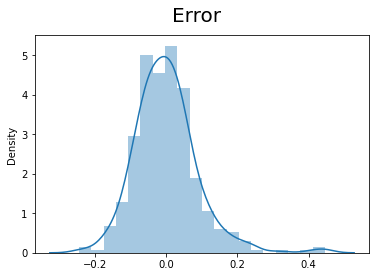

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train_price = lr_4.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error', fontsize = 20)        


Como podemos ver, los términos de error se parecen mucho a una distribución normal. Entonces podemos avanzar y hacer predicciones utilizando el modelo en el conjunto de datos de prueba.

Hacer predicciones usando el modelo final
Hemos ajustado el modelo y comprobado la normalidad de los términos de error. Hagamos predicciones usando el modelo final.

Similar al conjunto de datos de entrenamiento. Primero, tenemos que escalar los datos de prueba.

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

print(df_test)

        price      area  bedrooms  ...  prefarea  semi-furnished  unfurnished
265  0.229697  0.091869       0.4  ...         1               1            0
54   0.484848  0.366420       0.4  ...         0               1            0
171  0.303030  0.742080       0.4  ...         1               1            0
244  0.242424  0.306582       0.4  ...         1               1            0
268  0.227879  0.274023       0.6  ...         0               1            0
..        ...       ...       ...  ...       ...             ...          ...
413  0.145455  0.010032       0.4  ...         1               0            1
191  0.284848  0.780007       0.4  ...         0               1            0
310  0.206061  0.365100       0.4  ...         0               1            0
46   0.500000  0.366420       0.4  ...         0               0            0
50   0.490909  0.493136       0.4  ...         1               0            1

[164 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Después de dividir los datos de prueba en X e Y, eliminaremos las variables innecesarias de los datos de prueba según nuestro modelo.

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

X_test_m4 = sm.add_constant(X_test)

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

y_pred_m4 = lr_4.predict(X_test_m4)

hora, tenemos que ver si el modelo final predicho se ajusta mejor o no. Para hacer eso, calcularemos el valor R² para el modelo de prueba esperado.

Lo hacemos importando la r2_score biblioteca desde sklearn

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.660134403021964

El valor R² para los datos de prueba = 0,660134403021964,
el valor R² para los datos del tren = 0,667; podemos ver el valor en el resumen final del modelo anterior.

Dado que los valores R² tanto para el tren como para los datos de prueba son casi iguales, el modelo que construimos es el que mejor se ajusta.

## Interpretación

Construimos un modelo básico de regresión lineal múltiple en el aprendizaje automático de forma manual y utilizando un enfoque RFE automático. La mayoría de las veces, utilizamos regresión lineal múltiple en lugar de un modelo de regresión lineal simple porque la variable objetivo siempre depende de más de una variable.

Por lo tanto, es crucial aprender cómo funciona la regresión lineal múltiple en el aprendizaje automático y, sin conocer la regresión lineal simple, es un desafío comprender el modelo de regresión lineal múltiple.

## Fuente de este caso:
[https://ichi.pro/es/modelo-de-regresion-lineal-multiple-con-python-aprendizaje-automatico-228751987250986](https://ichi.pro/es/modelo-de-regresion-lineal-multiple-con-python-aprendizaje-automatico-228751987250986)